In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
src = "fibonacci/baseFibonacci.c"
exe_par = "exe_par.out"
exe_seq = "exe_seq.out"

!gcc -o exe_par.out -fopenmp fibonacci/baseFibonacci.c
!gcc -o exe_seq.out fibonacci/baseFibonacci.c

N_values = range(0, 41)   
repeats = 10              

results_par = []
results_seq = []

for exe, results in [(exe_par, results_par), (exe_seq, results_seq)]:
    for N in N_values:
        times = []
        for _ in range(repeats):
            start = time.perf_counter()
            subprocess.run([f"./{exe}", str(N)], stdout=subprocess.DEVNULL)
            end = time.perf_counter()
            times.append(end - start)
        mean = np.mean(times)
        std = np.std(times)
        results.append((mean, std))

means_par, stds_par = zip(*results_par)
means_seq, stds_seq = zip(*results_seq)

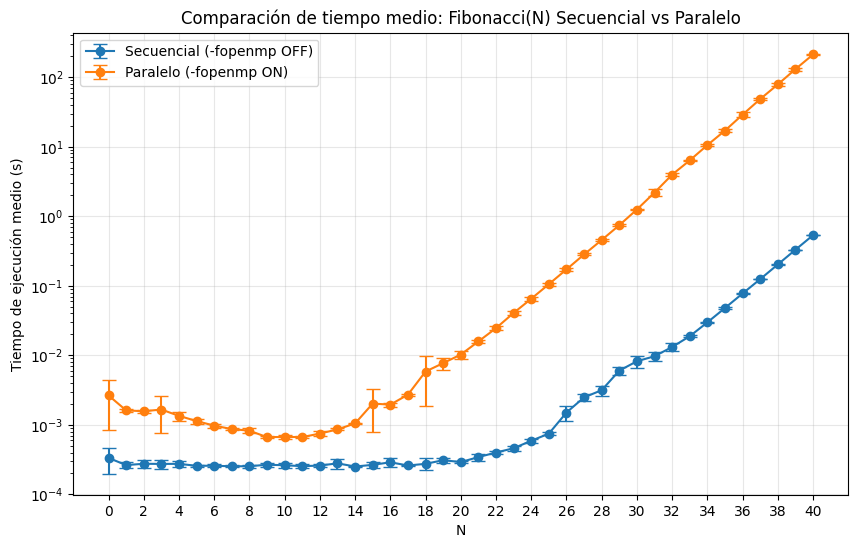

In [3]:
plt.figure(figsize=(10,6))
plt.errorbar(N_values, means_seq, yerr=stds_seq, capsize=5, label="Secuencial (-fopenmp OFF)", fmt='-o')
plt.errorbar(N_values, means_par, yerr=stds_par, capsize=5, label="Paralelo (-fopenmp ON)", fmt='-o')
plt.xticks(range(min(N_values), max(N_values) + 1, 2))
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title("Comparación de tiempo medio: Fibonacci(N) Secuencial vs Paralelo")
plt.yscale("log")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

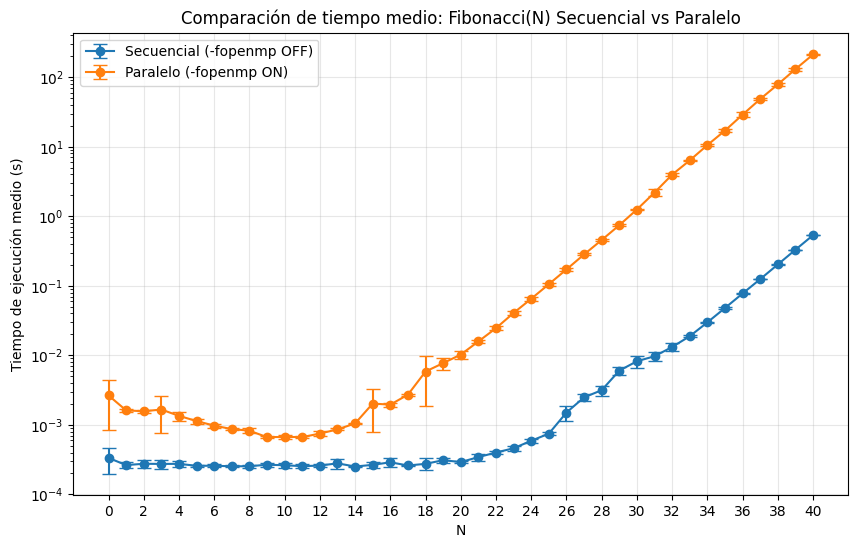

In [9]:
plt.figure(figsize=(10,6))
plt.errorbar(N_values, means_seq, yerr=stds_seq, capsize=5, label="Secuencial (-fopenmp OFF)", fmt='-o')
plt.errorbar(N_values, means_par, yerr=stds_par, capsize=5, label="Paralelo (-fopenmp ON)", fmt='-o')
plt.xticks(range(min(N_values), max(N_values) + 1, 2))
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title("Comparación de tiempo medio: Fibonacci(N) Secuencial vs Paralelo")
plt.yscale("log")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()